In [1]:
%run evaltools.ipynb

Populating the interactive namespace from numpy and matplotlib


In [2]:
datapath
df = read_data(datapath)

 120 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.2077348228337995e-21) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=1.2077348228337995e-21) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 



/home/mjirik/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=35.0, right=35.0
  'left=%s, right=%s') % (left, right))


,surface error [%],volume error [%],measurement_resolution
0,-0.173384,-0.562160,35
87,-0.267361,-0.636923,35
86,-0.267361,-0.636923,35
85,-0.308620,-0.676092,35
84,-0.308620,-0.676092,35
83,-0.332255,-0.699166,35
82,-0.332255,-0.699166,35
81,-0.345678,-0.712834,35
80,-0.345678,-0.712834,35
79,-0.332610,-0.697244,35


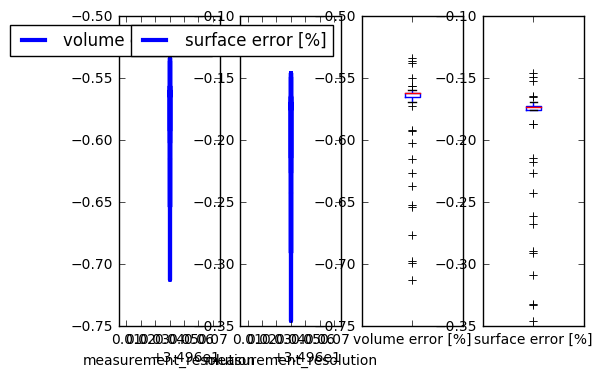

In [3]:
show_error(df)

In [4]:
list_filter(df.keys(), contain="note")

['config output note']

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 



/home/mjirik/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mjirik/miniconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.7442164310440706e-06) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.7442164310440706e-06) 
SpearmanrResult(correlation=nan, pvalue=nan) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=8.7326377918294149e-05) 
SpearmanrResult(correlation=1.0, pvalue=0.0) 

 20 :
volume (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.7442164310440706e-06) 
SpearmanrResult(correlation=nan, pvalue=nan) 
surface (w/s): 
WilcoxonResult(statistic=0.0, pvalue=7.7442164310440706e-06) 
SpearmanrResult(correlation=nan, pvalue=nan) 



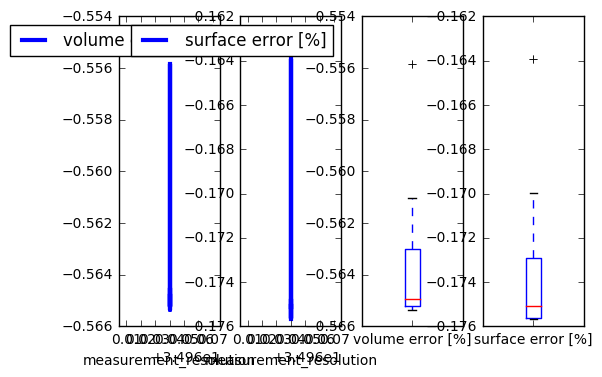

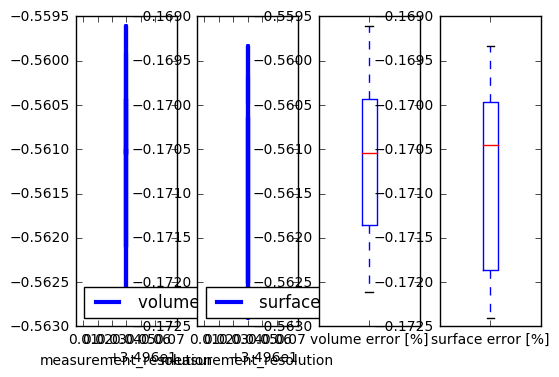

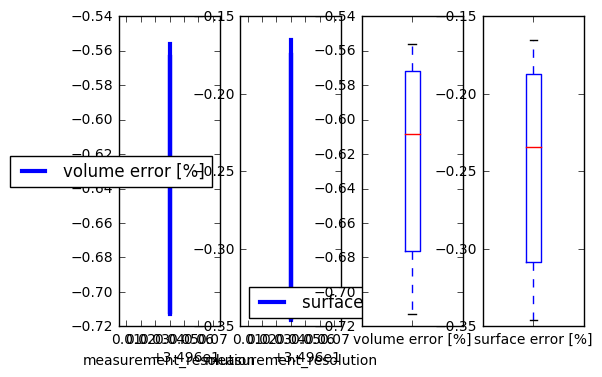

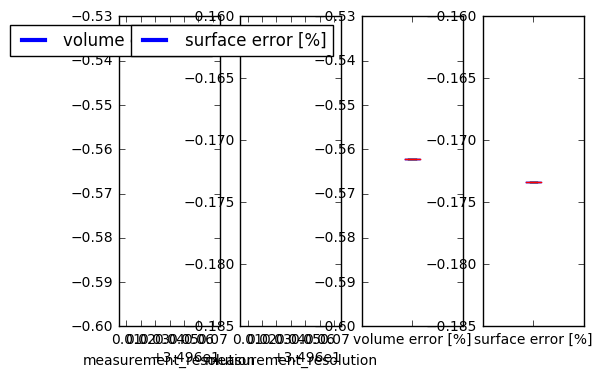

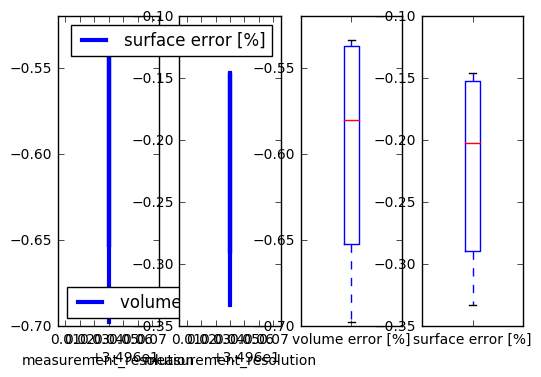

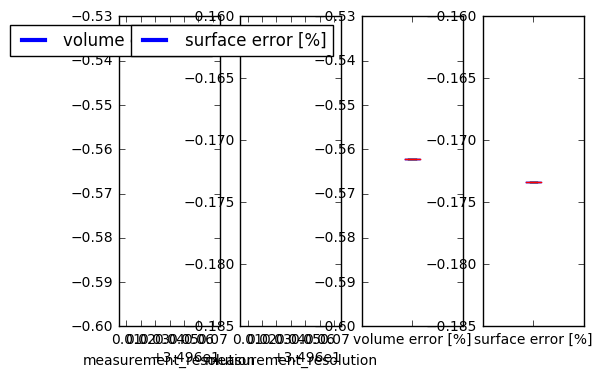

In [5]:
for note in np.unique(df["config output note"]):
    dfs = df[df["config output note"] == note]
    show_error(dfs)

# Object number

In [6]:

for radius_method in available_radius_methods:
    dfs = df[
        df["output note"] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(figsize=(5,3))
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)

KeyError: 'output note'

In [ ]:
zip(list(dfs_group))